#Анализ и предобработка

## Загрузка данных

Подключим необходимые библиотеки

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Так как исходные данные не имеют заголовков столбцов, добавим их явно для удобства

In [118]:
# head = ["timestamp",
# "cylinder",
# "customer",
# "job_number",
# "grain_screened",
# "ink_color",
# "proof_on_ctd_ink",
# "blade_mfg",
# "cylinder_division",
# "paper_type",
# "ink_type",
# "direct_steam",
# "solvent_type",
# "type_on_cylinder",
# "press_type",
# "press",
# "unit_number",
# "cylinder_size",
# "paper_mill_location",
# "plating_tank",
# "proof_cut",
# "viscosity",
# "caliper",
# "ink_temperature",
# "humifity",
# "roughness",
# "blade_pressure",
# "varnish_pct",
# "press_speed",
# "ink_pct",
# "solvent_pct",
# "ESA_Voltage",
# "ESA_Amperage",
# "wax",
# "hardener",
# "roller_durometer",
# "current_density",
# "anode_space_ratio",
# "chrome_content",
# "band_type"]

In [119]:
file_name = 'data.csv'

df = pd.read_csv(file_name, sep=",", encoding="utf-8", index_col=0) # если пропущенные значения отмечены специальным символом na_values="?"

In [120]:
# для txt
# data = pd.read_csv("data.txt", sep="\t", header=None, index_col=False)

In [121]:
# для xls
# data = pd.read_excel("data.xls")

In [122]:
# для xslx
# data = pd.read_excel("data.xlsx")

In [123]:
# для xml
# import xml.etree.ElementTree as ET
# import pandas as pd

# tree = ET.parse("data.xml")
# root = tree.getroot()

# data = []
# for child in root:
#     row = {}
#     for element in child:
#         row[element.tag] = element.text
#     data.append(row)

# df = pd.DataFrame(data)

In [124]:
# для doc
# from docx import Document

# document = Document("data.docx")

# data = []
# for table in document.tables:
#     for row in table.rows:
#         row_data = [cell.text for cell in row.cells]
#         data.append(row_data)

# df = pd.DataFrame(data)

In [125]:
# df.columns = head

Удалим повторяющиеся строки, если таковые имеются

In [126]:
df = df.drop_duplicates()

##Первичный анализ данных

Посмотрим на данные

In [127]:
df.head(10)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835.0,23.0,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0
1,2,7574516.0,40.0,10.0,single,rented,NaN,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0
2,3,3991815.0,66.0,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0
3,4,6256451.0,41.0,2.0,single,rented,NaN,Software_Developer,NaN,Odisha,2.0,12.0,1
4,5,5768871.0,47.0,NaN,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,NaN,1
5,6,6915937.0,64.0,0.0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,NaN,12.0,0
6,7,NaN,58.0,14.0,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8.0,12.0,0
7,8,1706172.0,33.0,2.0,NaN,rented,no,Economist,Jamnagar,Gujarat,2.0,NaN,0
8,9,7566849.0,24.0,17.0,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,NaN,11.0,0
9,10,8964846.0,23.0,12.0,single,NaN,no,Architect,NaN,Telangana,5.0,13.0,0


Заметим, что в данных
- имеются пропуски;
- имеются как числовые, так и категориальные признаки
- имеются целочисленные и нечелочисленные числовые признаки

Посмотрим информацию о датасете

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   252000 non-null  int64  
 1   income               212000 non-null  float64
 2   age                  212000 non-null  float64
 3   experience           212000 non-null  float64
 4   married              212000 non-null  object 
 5   house_ownership      212000 non-null  object 
 6   car_ownership        212000 non-null  object 
 7   profession           212000 non-null  object 
 8   city                 212000 non-null  object 
 9   state                212000 non-null  object 
 10  current_job_years    212000 non-null  float64
 11  current_house_years  212000 non-null  float64
 12  risk_flag            252000 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 26.9+ MB


Заметим, что в датасете присутствуют пропущенные значения, значит в дальнейшем придется решать эту проблему

Построим описательную статистику датасета для числовых признаков

In [129]:
df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.120000e+05,212000.000000,212000.000000,212000.000000,212000.000000,252000.000000
mean,126000.500000,5.001149e+06,49.944627,10.100670,6.332241,11.997156,0.123000
std,72746.278255,2.879121e+06,17.059594,6.003362,3.644469,1.398789,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.504720e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.008596e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.479878e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Видим, что средние по признакам значительно различаются, а также слишком разный диапозон значений - в дальнейшем придется нормализировать данные.

Построим описательную статистику датасета для категориальных признаков

In [130]:
df.describe(include=['object'])

,married,house_ownership,car_ownership,profession,city,state
count,212000,212000,212000,212000,212000,212000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,190414,195126,147994,5020,1062,23940


Заметим, что в данных имеется 2 бинарных признака - married и car_ownership. Также имеются колонки с большим количеством категорий - city

Выделим числовые и категориальные признаки в датасете

In [131]:
numeric_columns = df.select_dtypes(include=[int, float]).columns
numeric_columns

Index(['Id', 'income', 'age', 'experience', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [132]:
categorial_columns = df.select_dtypes(exclude=[int, float]).columns
categorial_columns

Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')

Рассмотрим признаки как случайные величины. Начнём с числовых и выведем их гистограммы значений.

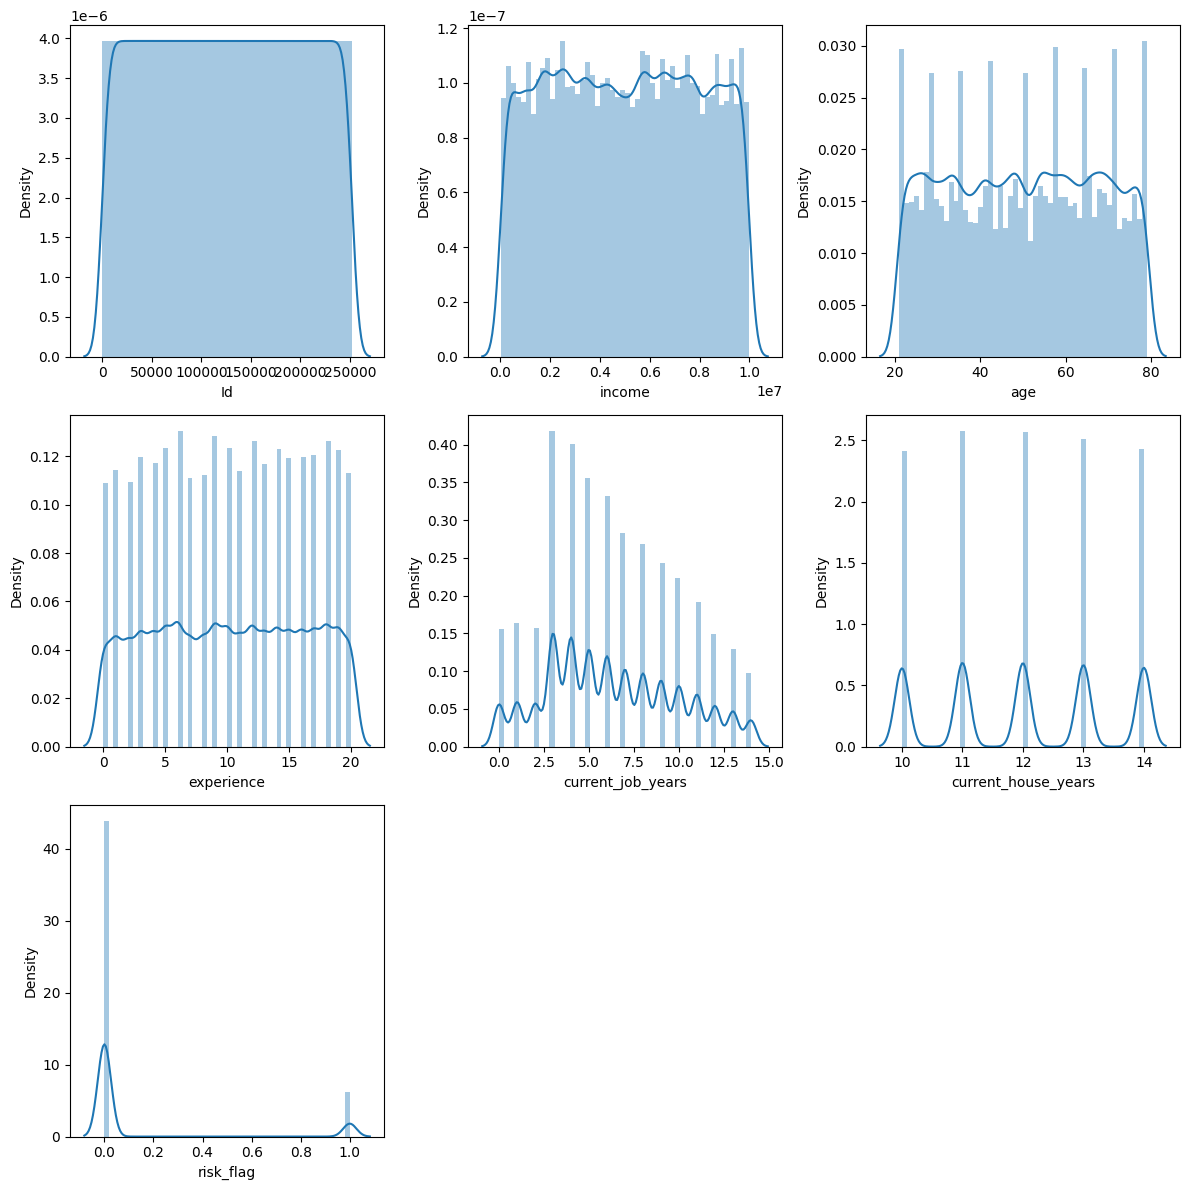

In [133]:
plt.figure(figsize=(12, 12))
for i in range(len(numeric_columns)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[numeric_columns[i]].dropna())
    plt.tight_layout()
plt.show()

Признак Id имеет явное равномерное распределение, столбцы income и age также близки к равномерному распределению. В остальных данных наблюдается тенденция приверженности нормальному распределению

Построим гистограммы значений для категориальных признаков

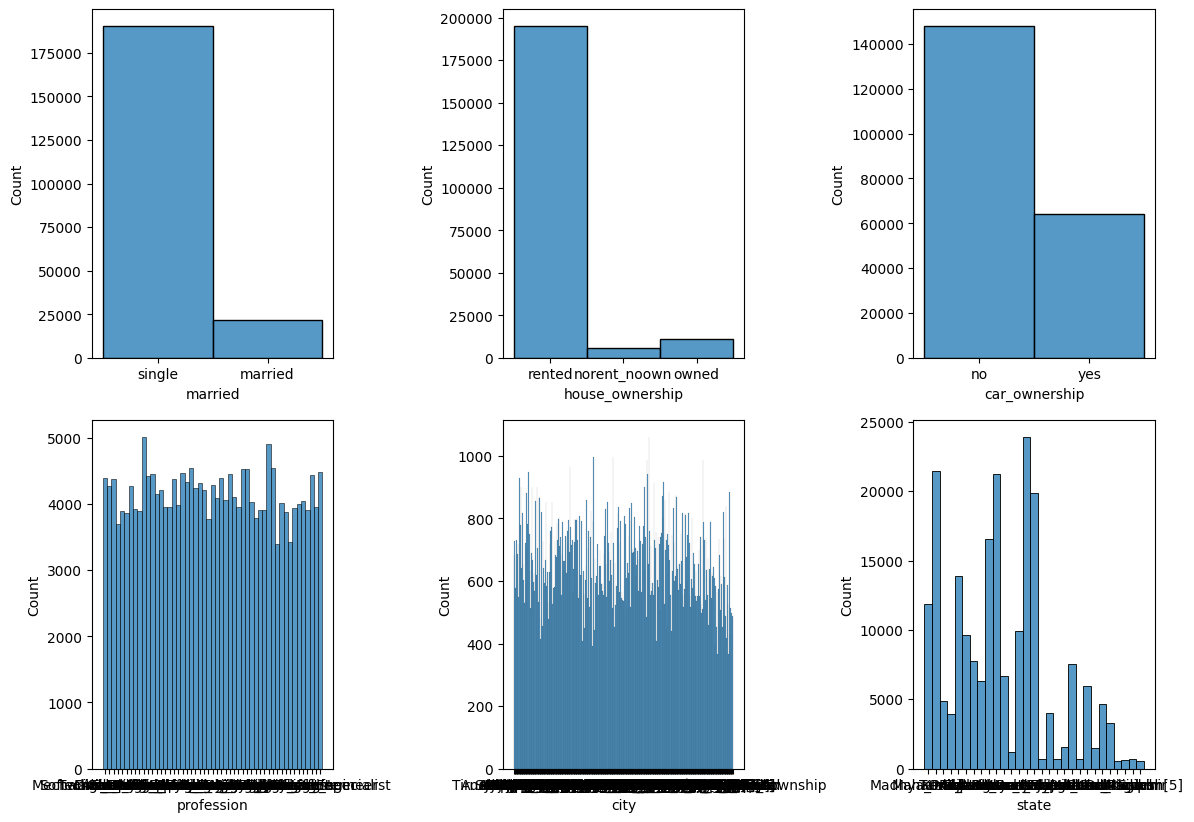

In [134]:
plt.figure(figsize=(12, 12))
for i in range(len(categorial_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[categorial_columns[i]])
    plt.tight_layout()
plt.show()

Судя по графикам, в данных наблюдается дизбаланс

Посмотрим процент уникальных элементов по каждой колонке.

In [135]:
percent_unique = df.nunique() / len(df) * 100
print(percent_unique)

Id                     100.000000
income                  14.343254
age                      0.023413
experience               0.008333
married                  0.000794
house_ownership          0.001190
car_ownership            0.000794
profession               0.020238
city                     0.125794
state                    0.011508
current_job_years        0.005952
current_house_years      0.001984
risk_flag                0.000794
dtype: float64


Видим, что столбец Id абсолютно уникален для каждого объекта, он неинформативен - в нем содержатся идентификаторы клиентов. Избавимся от него.

In [136]:
df.drop(['Id'], axis=1, inplace=True)

In [137]:
numeric_columns = numeric_columns.drop("Id")

Посмотрим количество пропущенных значений в каждом из столбцов

In [138]:
df.isna().sum()

income                 40000
age                    40000
experience             40000
married                40000
house_ownership        40000
car_ownership          40000
profession             40000
city                   40000
state                  40000
current_job_years      40000
current_house_years    40000
risk_flag                  0
dtype: int64

Попробуем удалить из датасета строки с пропущенными значениями и взглянем, сколько данных останется

In [139]:
df.dropna().shape[0]

37844

Как видим, после удаления строк с пропущенными значения останется приблизительно 15% данных. Такое действие недопустимо, поэтому предобработаем их другими способами.

##Заполнение пропусков, приведение типов

Самые популярные подходы при заполнении пропусков в данных включают:

- Заполнение пропусков модой: Мода представляет собой наиболее часто встречающееся значение в столбце. Заполнение пропусков модой особенно полезно для категориальных данных, где значения представлены в виде категорий или меток.

- Заполнение пропусков средним значением: Среднее значение представляет собой сумму всех значений в столбце, деленную на количество наблюдений. Заполнение пропусков средним значением особенно полезно для числовых данных.

- Заполнение пропусков медианой: Медиана представляет собой значение, которое находится в середине упорядоченного списка значений. Заполнение пропусков медианой также полезно для числовых данных и особенно эффективно в случаях, когда данные содержат выбросы или аномальные значения.

Напишем метод, ищущий моду. Пропускает все неопределенные (`NaN`) значения. Мы не можем сразу взять все колонки, так как в этом случае пропуск неопределенных значений будет пропускать строки, в которых есть хотя бы одно неопределенное значение.

In [140]:
def find_mode(df, columns=[], type_vals='str', verbose=False):
    modes = []
    for col in columns:
        modes.append(df[col].dropna().value_counts().idxmax())
    return modes

Напишем метод, ищущий медиану в колонке. Пропускает все неопределенные (NaN) значения.



In [141]:
def find_median(df, columns=[], type_vals='int64', verbose=False):
    medians = []
    for col in columns:
        medians.append(np.median(df[col].dropna().astype(type_vals)))
    return medians

Напишем метод, ищущий среднее значение в колонке. Так же пропускает все неопределенные (NaN) значения.

In [142]:
def find_mean(df, columns=[], type_vals='int64', verbose=False):
    means = []
    for col in columns:
        means.append(np.mean(df[col].dropna().astype(type_vals)))
    return means

Напишем метод, заполняющий значения по переданному правилу: модой, медианой или средним значением.

In [143]:
def fill_missing_values(df, columns=[], method='mode', type_vals='str'):
    if method == 'mode':
        fill_values = find_mode(df, columns, type_vals)
    elif method == 'median':
        fill_values = find_median(df, columns, type_vals)
    elif method == 'mean':
        fill_values = find_mean(df, columns, type_vals)
    else:
        raise ValueError("Invalid method. Please choose 'mode' or 'median'.")

    for col, fill_value in zip(columns, fill_values):
        df[col].fillna(fill_value, inplace=True)

    return df

###Обработка числовых значений

Напишем метод для получения уникальных значений для каждого из переданных столбцов, при этом, если уникальных значений больше, чем max_print, то не печатаем их

In [144]:
def get_unique_values(df, max_print, columns=[]):
    unique_values = {}
    for col in columns:
        if len(df[col].dropna().unique()) <= max_print:
            unique_values[col] = df[col].dropna().unique()
    return unique_values

In [145]:
get_unique_values(df, 60, columns=numeric_columns)

{'age': array([23., 40., 66., 41., 47., 64., 58., 33., 24., 22., 28., 57., 72.,
        54., 50., 35., 76., 31., 52., 21., 26., 55., 77., 71., 78., 63.,
        30., 45., 25., 73., 48., 27., 74., 67., 46., 39., 56., 59., 68.,
        79., 60., 32., 65., 42., 49., 61., 29., 37., 69., 62., 53., 70.,
        75., 43., 38., 44., 34., 36., 51.]),
 'experience': array([ 3., 10.,  4.,  2.,  0., 14., 17., 12.,  7.,  9.,  6.,  8.,  1.,
        13., 19., 15., 20.,  5., 16., 11., 18.]),
 'current_job_years': array([ 3.,  9.,  4.,  2.,  8.,  5.,  7.,  6., 12.,  1., 10., 13., 14.,
        11.,  0.]),
 'current_house_years': array([13., 10., 12., 11., 14.]),
 'risk_flag': array([0, 1])}

Видим, что колонка age заполнена значениями от 21 до 79. Заполним ее пропуски целочисленными значениями. Также заполним целочисленными значениями пропуски колонок experience, current_job_years, current_house_years.

Для заполнения будем использовать медиану по следующим причинам:

- Устойчивость к выбросам: Медиана является устойчивой мерой центральной тенденции и не чувствительна к выбросам в данных. В случае наличия выбросов, среднее значение может быть сильно искажено, в то время как медиана остается более стабильной.

- Сохранение целочисленности: Если пропуски находятся в целочисленных столбцах, заполнение медианой позволяет сохранить целочисленность значений. В то время как среднее значение может быть десятичным числом, медиана всегда будет целым числом, что может быть важным при работе с определенными типами данных или алгоритмами.

- Сохранение распределения: Заполнение медианой также помогает сохранить общую форму распределения данных. Среднее значение может сдвинуться в одну из сторон и исказить распределение, особенно если данные имеют асимметричную форму.

In [155]:
int_cols=['age', 'experience', 'current_job_years', 'current_house_years']
fill_missing_values(df, columns=[], method='mode', type_vals='str')


Колонка risk_flag имеет всего 2 различных значения - она бинарная, заполним ее пропущенные значения модой

In [147]:
bin_cols=['risk_flag']
fill_missing_values(df, columns=[], method='mode', type_vals='int32')

Колонка income имеет большое стандартное отклонение и имеет смысл заполнить значения средним по колонке

In [158]:
float_cols = ['income']
fill_missing_values(df, columns=[], method='mean', type_vals='float')

Снова посмотрим на количество пропущенных значений в каждом столбце

In [160]:
df.isna().sum()

AttributeError: ignored

Убедимся, что заполнение пропусков не изменило исходного распределения данных

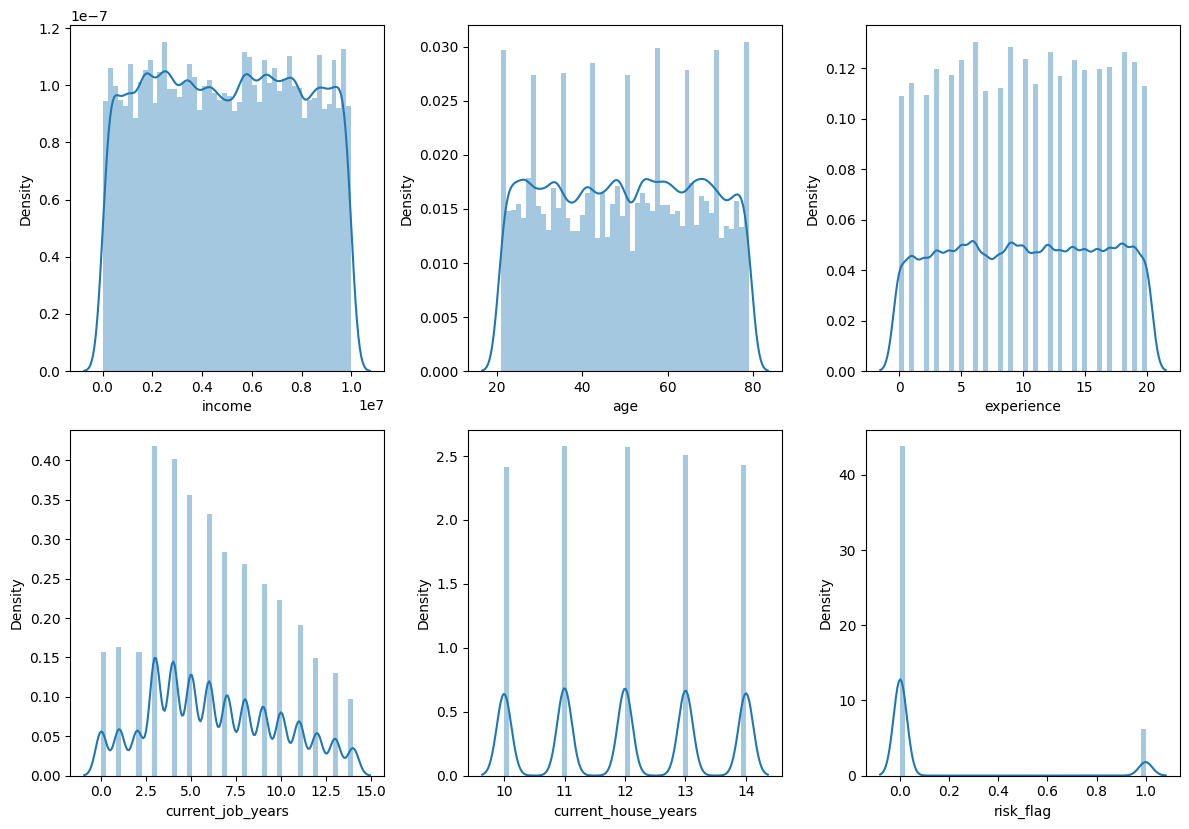

In [151]:
plt.figure(figsize=(12, 12))
for i in range(len(numeric_columns)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[numeric_columns[i]])
    plt.tight_layout()
plt.show()

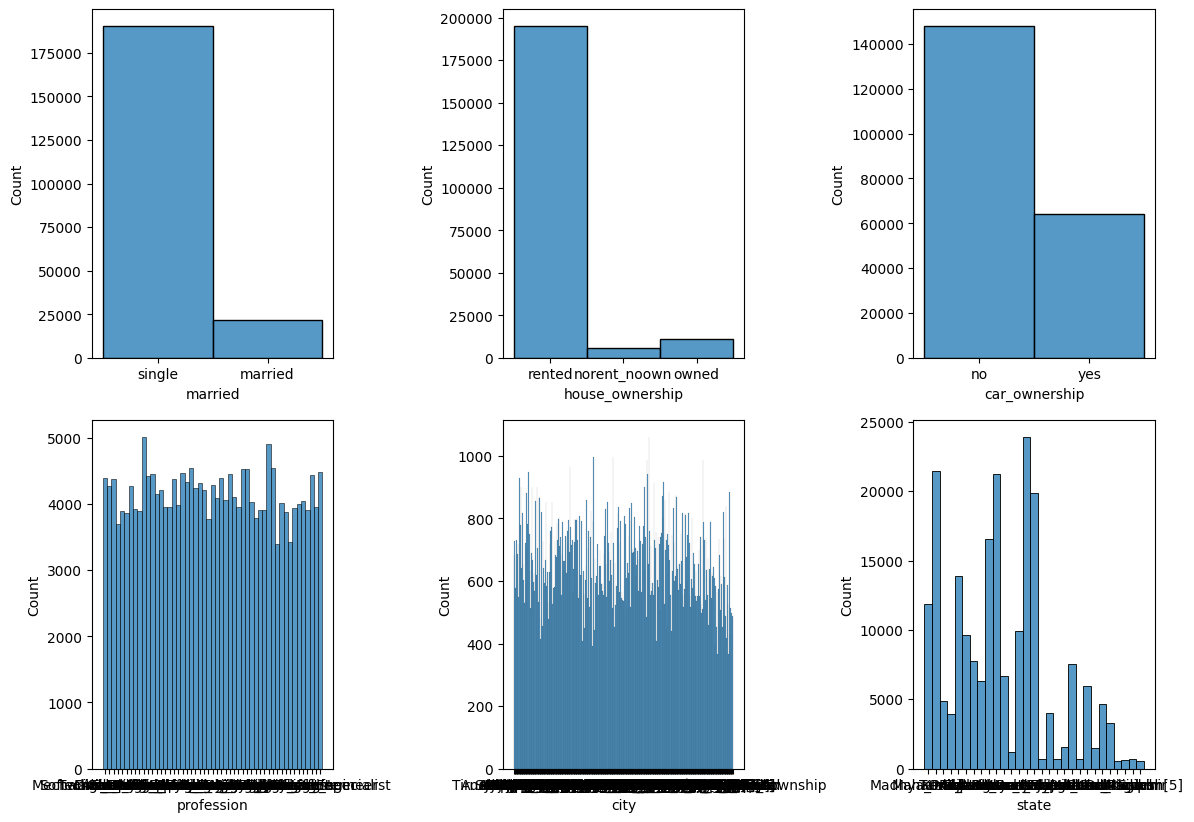

In [152]:
plt.figure(figsize=(12, 12))
for i in range(len(categorial_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[categorial_columns[i]])
    plt.tight_layout()
plt.show()

Посмотрим на корелляцию числовых признаков между собой после заполнения

In [153]:
df[numeric_columns].corr()

,income,age,experience,current_job_years,current_house_years,risk_flag
income,1.000000,-0.002330,0.004208,0.007645,0.000248,-0.003203
age,-0.002330,1.000000,-0.002425,0.001556,-0.019742,-0.022839
experience,0.004208,-0.002425,1.000000,0.645373,0.016407,-0.035697
current_job_years,0.007645,0.001556,0.645373,1.000000,0.004977,-0.016758
current_house_years,0.000248,-0.019742,0.016407,0.004977,1.000000,-0.004219
risk_flag,-0.003203,-0.022839,-0.035697,-0.016758,-0.004219,1.000000


<Axes: >

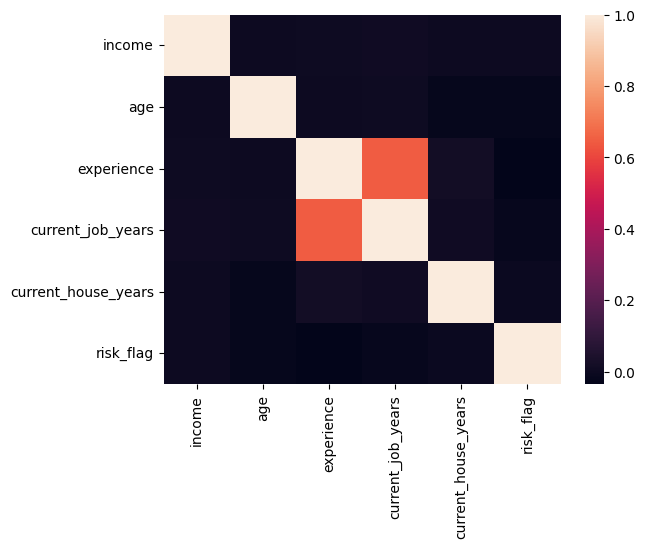

In [154]:
sns.heatmap(df[numeric_columns].corr())